In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
adm = pd.read_csv(r'C:\Users\Om\OneDrive\Documents\Labs\MLEL\Admission Chance.csv')

In [43]:
adm

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [10]:
adm.shape[0]

400

In [11]:
adm.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
adm.dtypes

Serial No              int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
 SOP                 float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [11]:
summary_stats = adm.describe()
range_values = summary_stats.loc['max'] - summary_stats.loc['min']
summary_stats.loc['range'] = range_values
print(summary_stats)

        Serial No   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   
range  399.000000   50.000000    28.000000           4.000000    4.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362  

In [9]:
adm.groupby('Research').mean()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
Research,,,,,,,,
0,208.519337,309.491713,104.143646,2.524862,2.908840,3.060773,8.257182,0.637680
1,193.872146,322.853881,110.109589,3.552511,3.805936,3.776256,8.881370,0.795982


In [28]:
adm.groupby('Research').median()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
Research,,,,,,,,
0,220.0,310.0,104.0,2.0,3.0,3.0,8.27,0.65
1,191.0,324.0,110.0,4.0,4.0,4.0,8.97,0.80


In [30]:
adm.groupby('Research').agg(['mean', 'median'])

Serial No          GRE Score        TOEFL Score         \
                mean median        mean median        mean median   
Research                                                            
0         208.519337  220.0  309.491713  310.0  104.143646  104.0   
1         193.872146  191.0  322.853881  324.0  110.109589  110.0   

         University Rating              SOP             LOR              CGPA  \
                      mean median      mean median      mean median      mean   
Research                                                                        
0                 2.524862    2.0  2.908840    3.0  3.060773    3.0  8.257182   
1                 3.552511    4.0  3.805936    4.0  3.776256    4.0  8.881370   

                Chance of Admit          
         median             mean median  
Research                                 
0          8.27         0.637680   0.65  
1          8.97         0.795982   0.80

In [40]:
import matplotlib.pyplot as plt

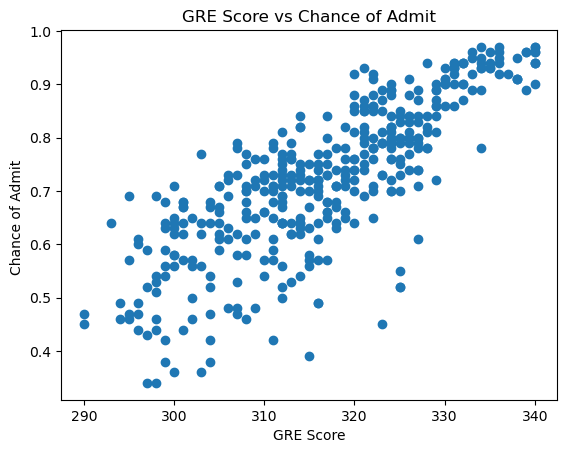

In [46]:
plt.scatter(adm['GRE Score'], adm['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.title('GRE Score vs Chance of Admit')
plt.show()

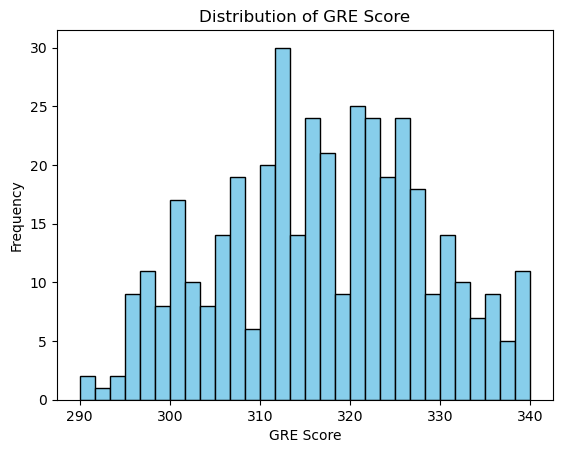

In [50]:
plt.hist(adm['GRE Score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.title('Distribution of GRE Score')
plt.show()

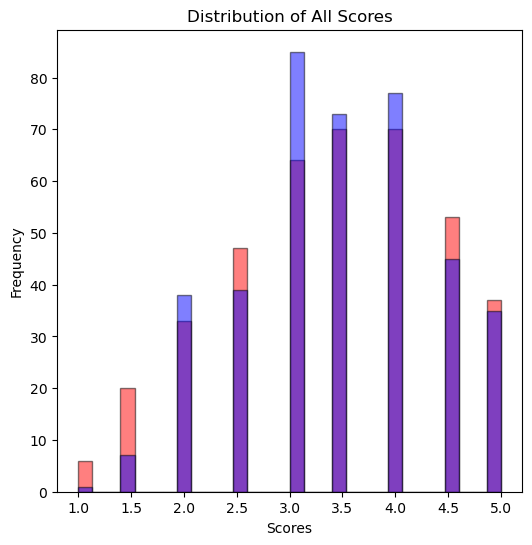

In [70]:
plt.figure(figsize=(6,6))
Scores = [' SOP','LOR ']
colors = ['red','blue']
for Score, color in zip(Scores, colors):
    plt.hist(adm[Score], alpha = 0.5, bins = 30, color = color, edgecolor = 'black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of All Scores')
plt.show()

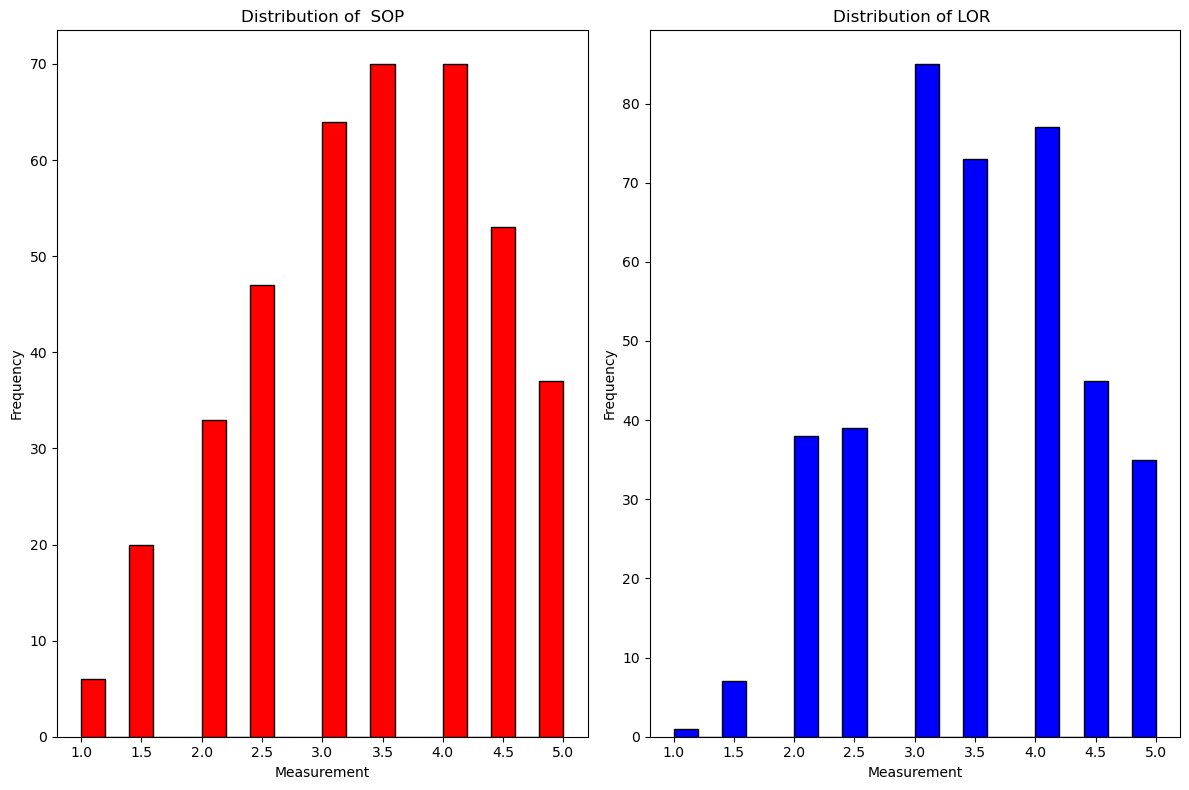

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, (Score, color) in enumerate(zip(Scores, colors)):
    axes[i].hist(adm[Score], bins=20, color=color, edgecolor='black')
    axes[i].set_title(f'Distribution of {Score}')
    axes[i].set_xlabel('Measurement')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

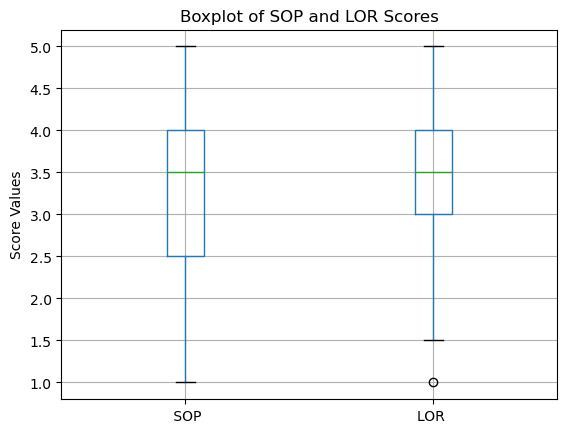

In [72]:
boxplot = adm.boxplot(column=Scores)
boxplot.set_title('Boxplot of SOP and LOR Scores')
boxplot.set_ylabel('Score Values')
plt.show()